In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.shape

(10000, 6)

In [4]:
df.head(20)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


<font size="6" color='pink'>Visualization</font>

<font size="4" color='yellow'>HeatMap</font>

In [7]:
new_df = df.copy()
new_df['Extracurricular Activities'] = new_df['Extracurricular Activities'].replace({'Yes':1, 'No':0})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_20120\3074238777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Extracurricular Activities'] = new_df['Extracurricular Activities'].replace({'Yes':1, 'No':0})


In [8]:
corr_matrix = new_df.corr()
corr_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


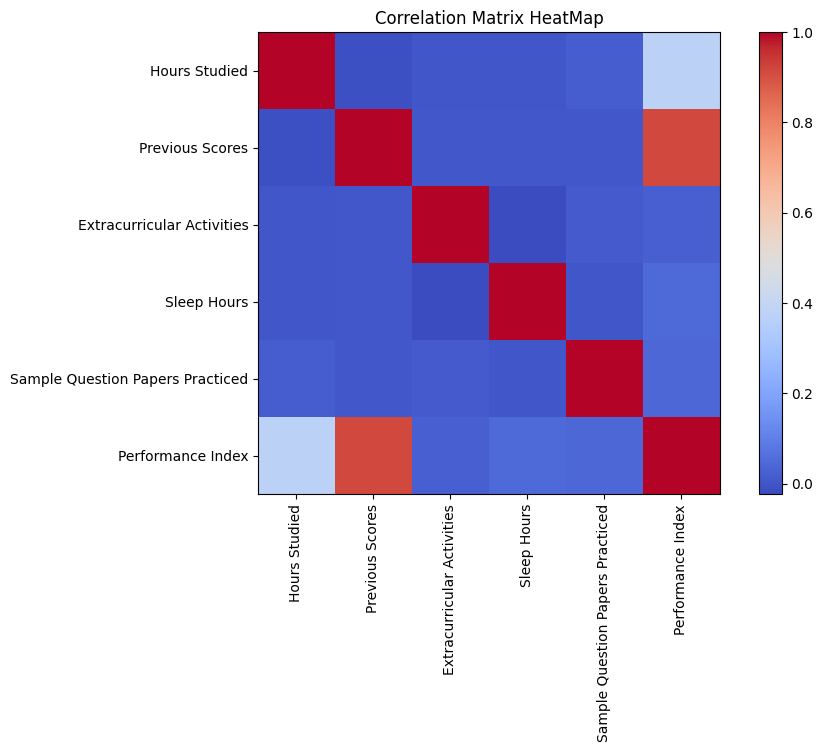

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
plt.xticks(rotation=90)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix HeatMap')
plt.show()

<font size="4" color='yellow'>Outliers</font>

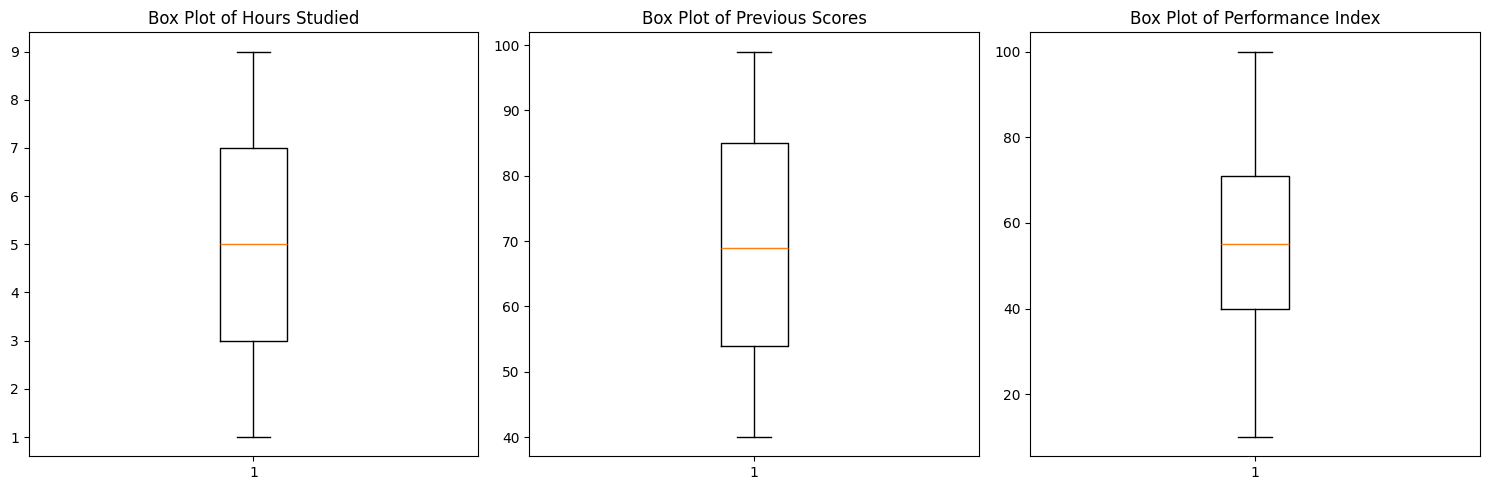

In [10]:
data1 = df['Hours Studied']
data2 = df['Previous Scores']
data3 = df['Performance Index']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(data1)
axes[0].set_title('Box Plot of Hours Studied')

axes[1].boxplot(data2)
axes[1].set_title('Box Plot of Previous Scores')

axes[2].boxplot(data3)
axes[2].set_title('Box Plot of Performance Index')

plt.tight_layout()
plt.show()


<font size="4" color='yellow'>Bar Chart</font>

In [11]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
df['Hours Studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

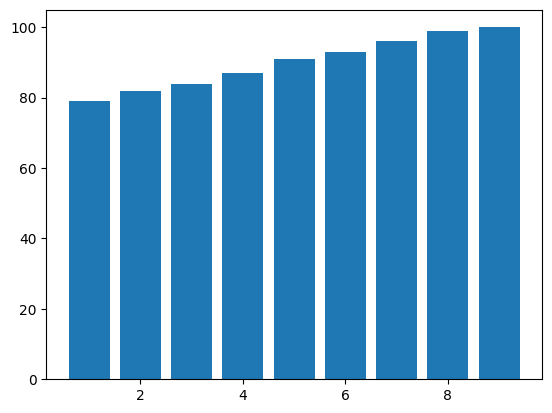

In [13]:
xpoints = df['Hours Studied']
ypoints = df['Performance Index']

plt.bar(xpoints, ypoints)
plt.show()

In [14]:
data = df.groupby('Hours Studied')['Previous Scores'].size()
data = (data/data.sum())*100
print(data)

Hours Studied
1    11.52
2    10.85
3    11.19
4    10.85
5    10.94
6    11.33
7    11.29
8    10.88
9    11.15
Name: Previous Scores, dtype: float64


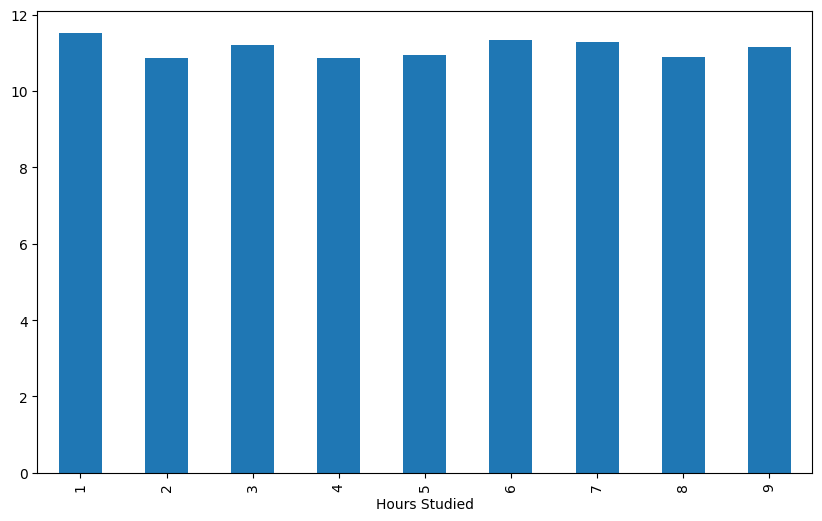

In [15]:
data.plot(kind='bar', figsize=(10,6))
plt.show()

<font size="6" color='pink'>Creating Ranges</font>

In [16]:
df['Sleep Hours'].unique()

array([9, 4, 7, 5, 8, 6])

In [17]:
bins = [0,2,5,float('inf')]
labels = ['0-2','3-5','6+']
df['HoursRange'] = pd.cut(df['Hours Studied'], bins=bins, labels=labels)

In [18]:
bins = [0,3,6,float('inf')]
labels = ['0-3','4-6','7+']
df['SleepHoursRange'] = pd.cut(df['Sleep Hours'], bins=bins, labels=labels)
df.drop('Sleep Hours', axis=1, inplace=True)

In [19]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,Performance Index,HoursRange,SleepHoursRange
0,7,99,Yes,1,91.0,6+,7+
1,4,82,No,2,65.0,3-5,4-6
2,8,51,Yes,2,45.0,6+,7+
3,5,52,Yes,2,36.0,3-5,4-6
4,7,75,No,5,66.0,6+,7+


In [20]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sample Question Papers Practiced    0
Performance Index                   0
HoursRange                          0
SleepHoursRange                     0
dtype: int64

In [21]:
df.drop('Hours Studied', axis=1, inplace=True)

<font size="6" color='pink'>Data Splitting</font>

In [22]:
y = df['Performance Index']
df.drop('Performance Index', axis=1, inplace=True)
X = df

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 8000
Length of X_test is 2000
Length of y_train is 8000
Length of y_test is 2000


<font size="6" color='pink'>Data Encoding</font>

In [25]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
transformer = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(sparse_output=False, drop='first'), ['Extracurricular Activities']),
    ('t2',OrdinalEncoder(categories=[['0-2','3-5','6+']]),['HoursRange']),
    ('t3',OrdinalEncoder(categories=[['0-3','4-6','7+']]),['SleepHoursRange'])
], remainder='passthrough')

In [27]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [28]:
feature_names = transformer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df.head(2)

,t1__Extracurricular Activities_Yes,t2__HoursRange,t3__SleepHoursRange,remainder__Previous Scores,remainder__Sample Question Papers Practiced
0,0.0,1.0,2.0,49.0,5.0
1,1.0,0.0,2.0,48.0,6.0


<font size="6" color='pink'>Data Scaling</font>

In [29]:
y_train = y_train.values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

In [30]:
y_test = y_test.values.reshape(-1, 1)

X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

<font size="6" color='pink'>Model Training</font>

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
len(y_pred)

2000

<font size="6" color='pink'>Evaluation</font>

In [39]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.1431068896067336


In [40]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.03107379227919171


In [41]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9690865425398881


In [33]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape}%")

Error rate is 50.25020694315649%


In [34]:
# Format is [Activity, Hours_Studied, Previous_Score, Sleep_Hours, Sample_Paper]
my_X = np.array([0.0, 9.0, 60.0, 9.0, 1.0]).reshape(1, -1) 
my_X1 = np.array([1.0, 8.0, 99.0, 10.0, 1.0]).reshape(1, -1)
my_X2 = np.array([1.0,5.0,49.0,10.0,0.0]).reshape(1,-1)

In [35]:
predicted_performance = model.predict(my_X)
predicted_performance1 = model.predict(my_X1)
predicted_performance2 = model.predict(my_X2)
print(f"Percentage of Avg Student is {predicted_performance[0].astype(int)}%")
print(f"Percentage of Good Student is {predicted_performance1[0].astype(int)}%")
print(f"Percentage of Poor Student is {predicted_performance2[0].astype(int)}%")

Percentage of Avg Student is [13]%
Percentage of Good Student is [15]%
Percentage of Poor Student is [12]%


<font size="5" color='red'>This code will give only 3% Error rate if i remove both hours related ranges and Scaling.</font>